In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.0 MB/s eta 0:00:00


In [ ]:
# ライブラリーの読み込み
import numpy as np
import pandas as pd
import pmdarima as pm
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_percentage_error
from matplotlib import pyplot as plt

# グラフのスタイルとサイズ
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 6]

 # 日本語化ライブラリ導入
!pip install japanize-matplotlib | tail -n 1
!pip install pystan~=2.14
!pip install plotly


# matplotlib日本語化対応
import japanize_matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 60.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp310-cp310-linux_x86_64.whl size=61976169 sha256=40ae270961d00c02126981c806fb4376b3a580669f20f9cb1679fe6868ef6309
  Stored in directory: /root/.cache/pip/wheels/3d/1c/94/4516243362eedbedad15ac4389691ee3bf2d45bec2639c9d8b
Successfully built pystan


358
353     2020年6月
354     2020年7月
355     2020年8月
356     2020年9月
357    2020年10月
Name: 年月, dtype: object
0     892392
1     755702
2    1064849
3     928704
4     911359
Name: 百貨店販売額（S), dtype: int64


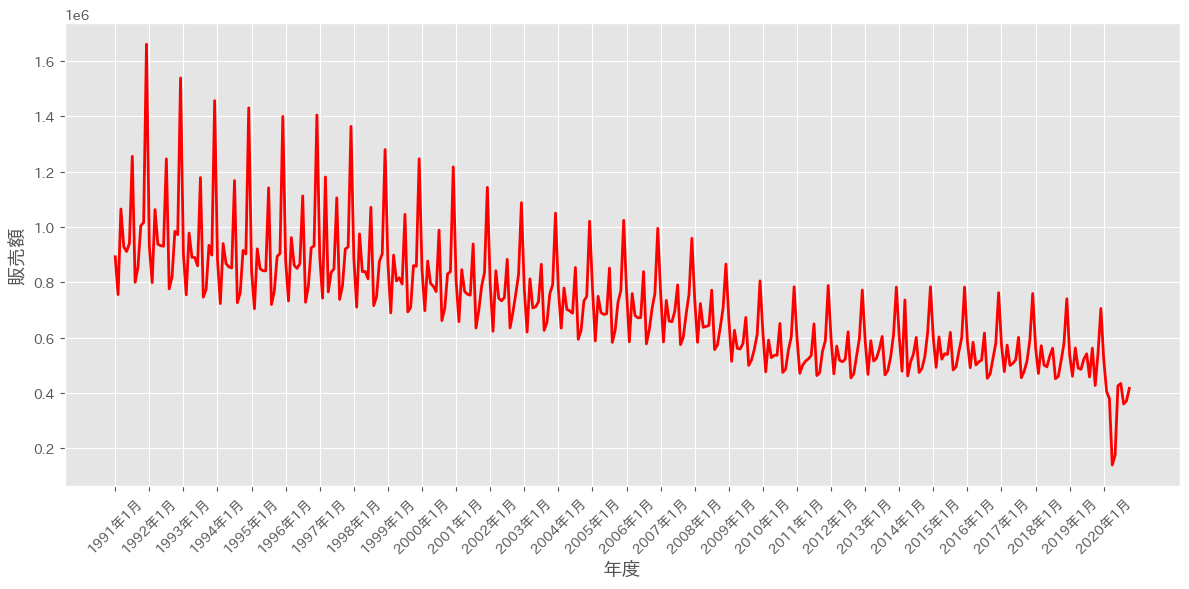

In [ ]:
#ファイルの読込み
df = pd.read_csv('department_sales.csv', encoding='utf-8', skiprows=0)
month = df.iloc[:, 0]
print(len(month))
print(month[-5:])

data = df.iloc[:, 1]
print(data[:5])


# 折れ線グラフを描画
#plt.figure(figsize=(12, 6))
plt.xticks(np.arange(0, 360, step=12))
plt.plot(month, data, color='r', linestyle='-', linewidth=2, markersize=8)
plt.xticks(np.arange(0, 360, step=12))
plt.xlabel('年度', fontsize=14)
plt.ylabel('販売額', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# グラフを表示
plt.show()

In [ ]:
# データの分割
train_size = int(len(data) * 0.8)  # 80%を学習データにする例
print(train_size)
train, test = data[:train_size], data[train_size:]


286


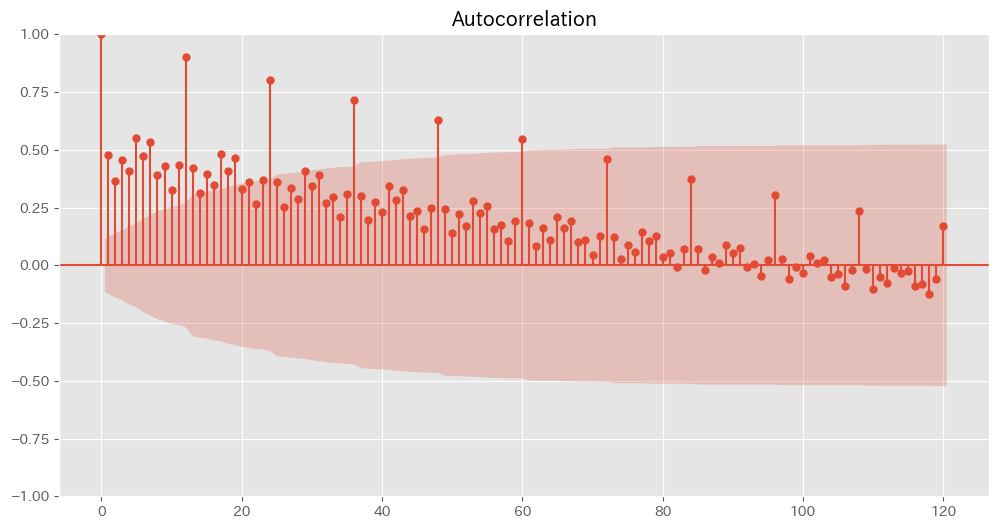

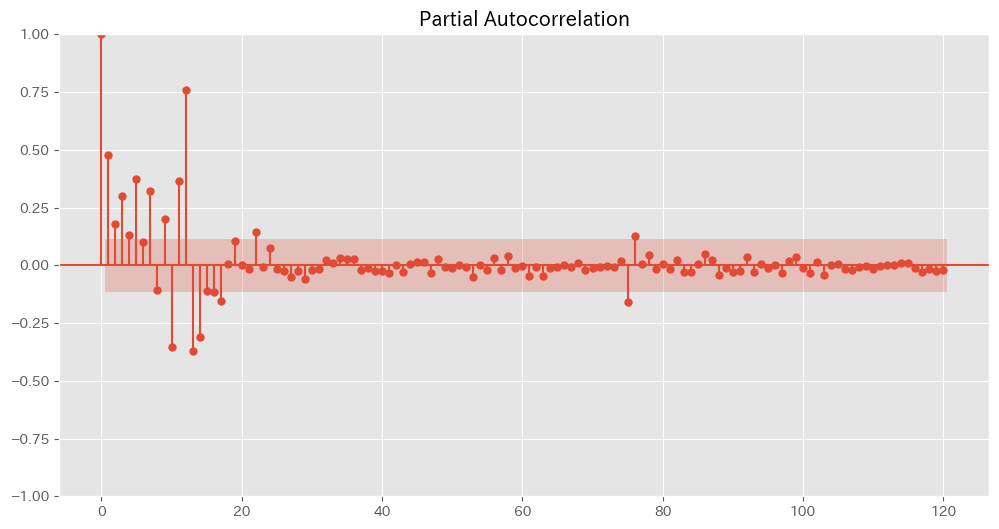

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

#相関係数のグラフ
plt.rc("figure", figsize = (12, 6))
grap = sm.graphics.tsa.plot_acf(train, lags = 120)
grap = sm.graphics.tsa.plot_pacf(train, lags = 120)



<Figure size 1200x600 with 0 Axes>

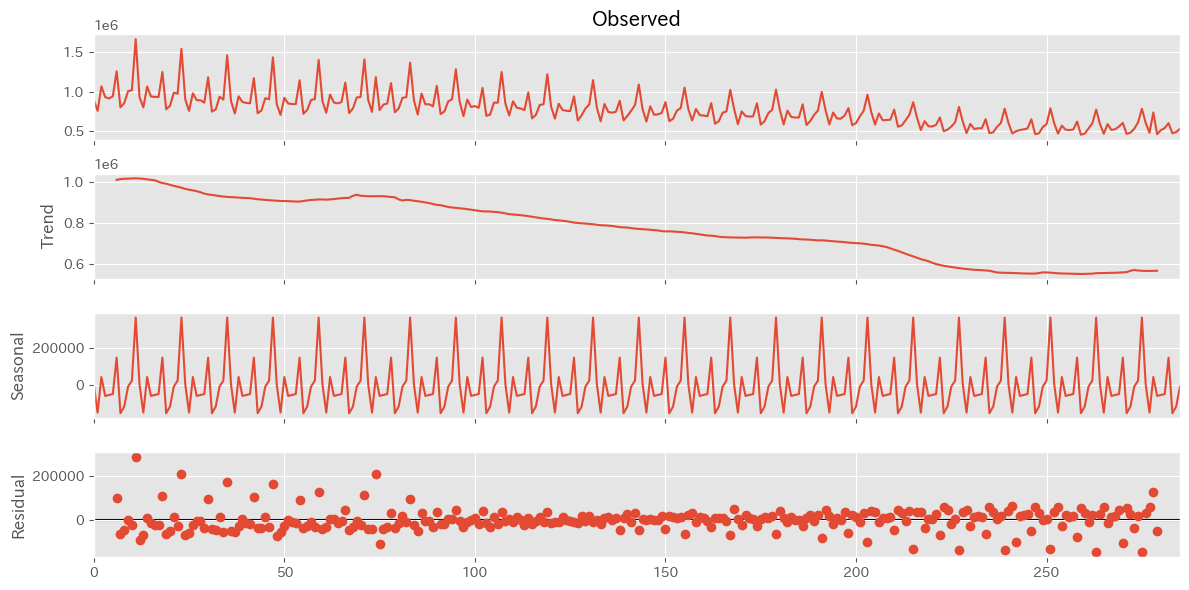

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12, 6))
# 成分分解を実行
result = seasonal_decompose(train.values, model='additive', period=12)

# 結果のプロット
result.plot()
plt.show()

<Figure size 1200x600 with 0 Axes>

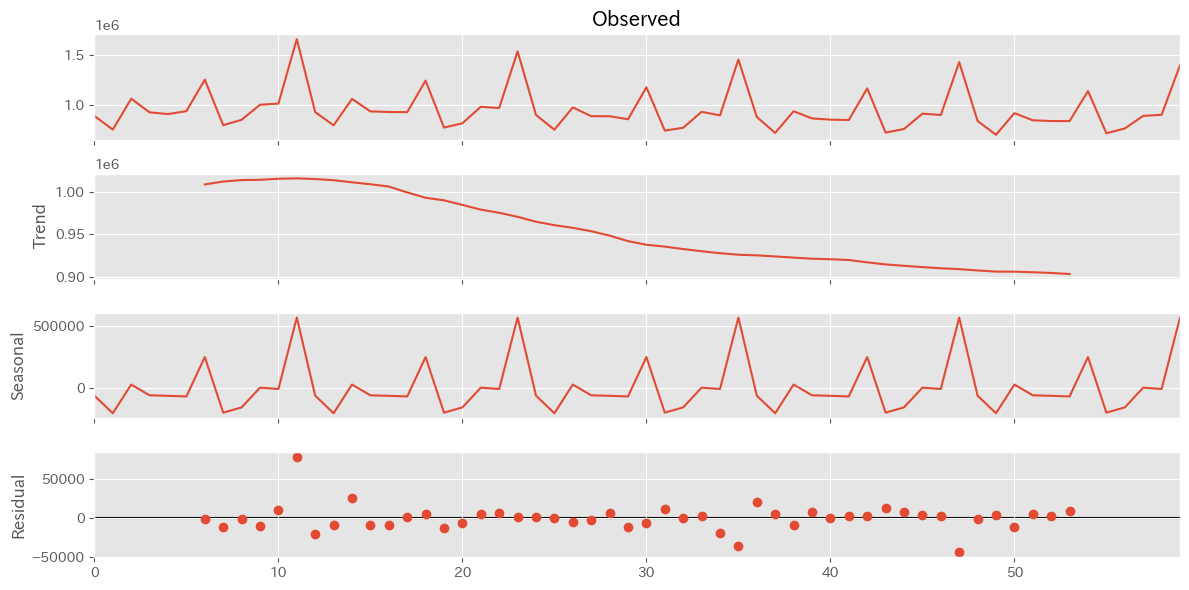

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(12, 6))
# 成分分解を実行
result = seasonal_decompose(train[:60].values, model='additive', period=12)

# 結果のプロット
result.plot()
plt.show()

<Figure size 1200x600 with 0 Axes>

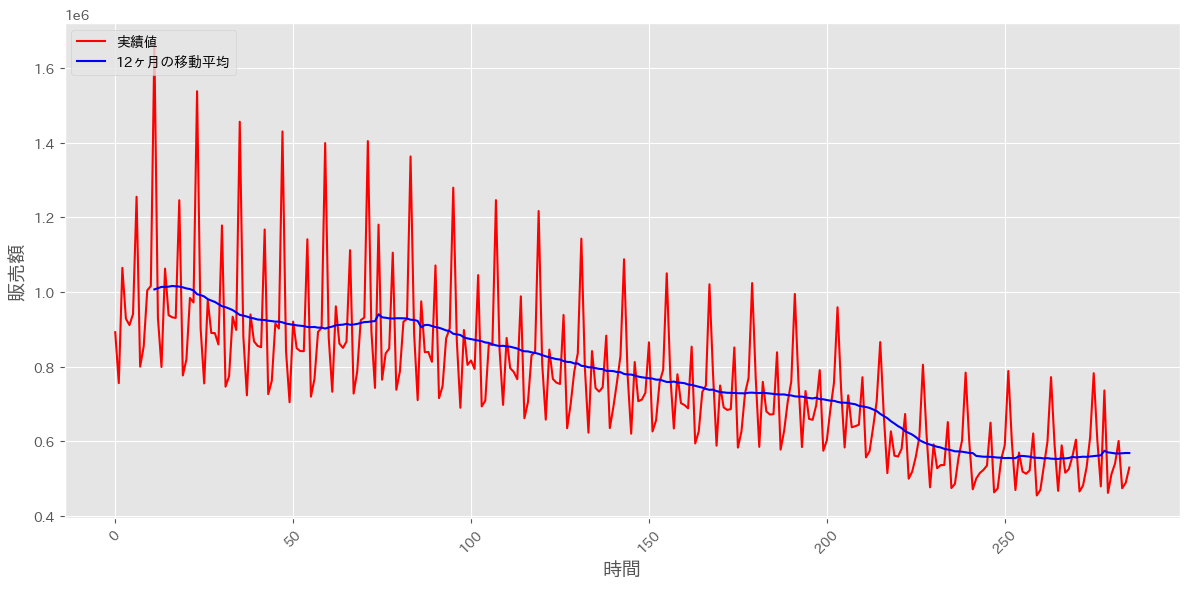

In [ ]:
# 移動平均の計算（例として5期間の移動平均を計算）
rolling_average = train.rolling(window=12).mean()

# グラフの描画
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots()

# 折れ線グラフ
plt.plot(train, label='実績値', color='red')

# 移動平均のグラフ
plt.plot(rolling_average, label='12ヶ月の移動平均', color='blue')

# グラフにタイトルと軸ラベルを追加
plt.xlabel('時間', fontsize=14)
plt.ylabel('販売額', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
ax.legend(loc='upper left')
plt.show()


In [ ]:
# 1次の階差を取得
data_diff = np.diff(train)
print(len(data_diff))
print(train[:6])
print(data_diff[:14])


285
0     892392
1     755702
2    1064849
3     928704
4     911359
5     940829
Name: 百貨店販売額（S), dtype: int64
[-136690  309147 -136145  -17345   29470  314738 -455615   54404  150232
   11505  644691 -730007 -131849  263971]


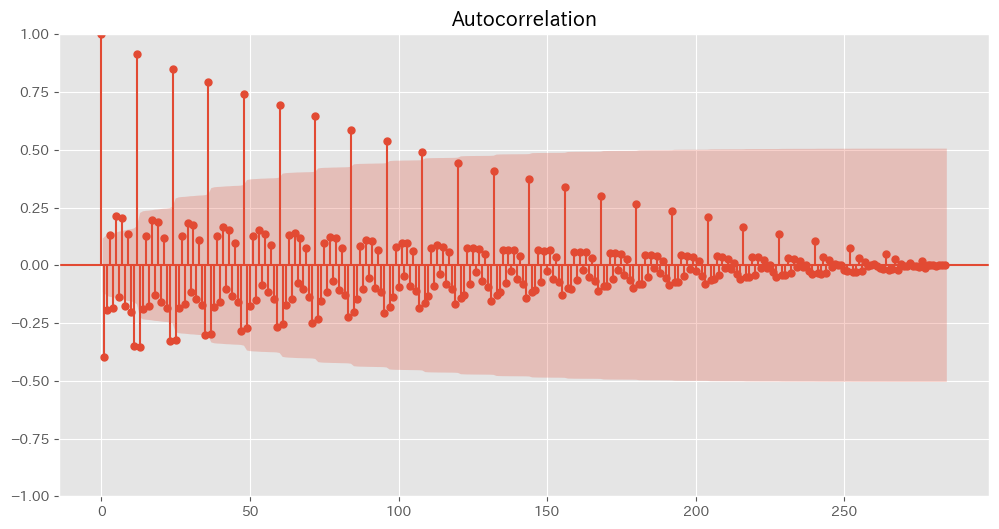

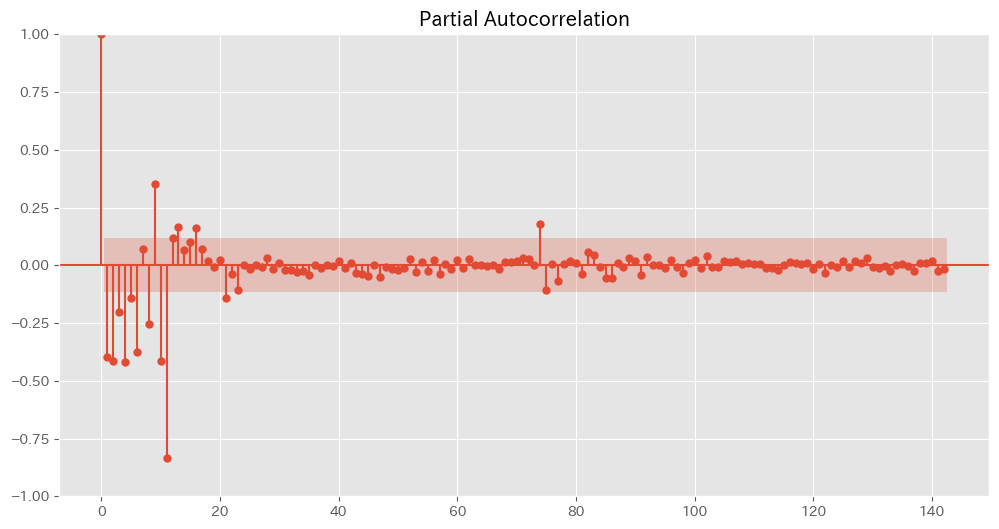

In [ ]:
#相関係数のグラフ
plt.rc("figure", figsize = (12, 6))
grap = sm.graphics.tsa.plot_acf(data_diff, lags = 284)
grap = sm.graphics.tsa.plot_pacf(data_diff, lags = 142)

In [ ]:
from statsmodels.tsa.stattools import adfuller

ADF Statistic: -3.016293547157864
p-value: 0.03340055135331736
Critical Values: {'1%': -3.454988209954765, '5%': -2.8723857312734613, '10%': -2.572549407997327}
時系列データは定常です


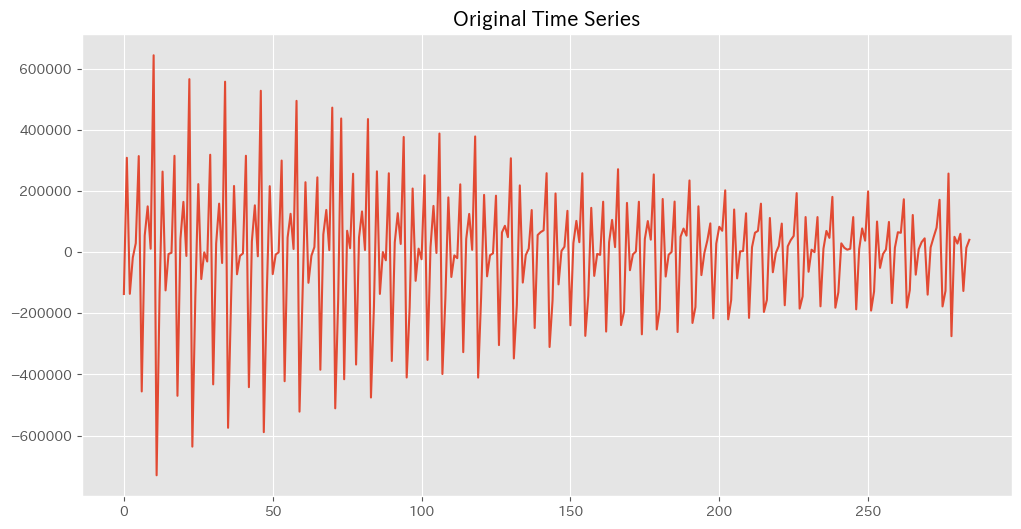

In [ ]:
# pandas Seriesに変換
tsr = pd.Series(data_diff)

# ADF検定の関数を適用
result = adfuller(tsr)

# 結果の表示
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# p-valueが有意水準（例: 0.05）より小さいかどうかで非定常性を判断
if result[1] <= 0.05:
    print("時系列データは定常です")
else:
    print("時系列データは非定常です")

# ADF検定結果をグラフで表示
tsr.plot(title='Original Time Series')
plt.show()


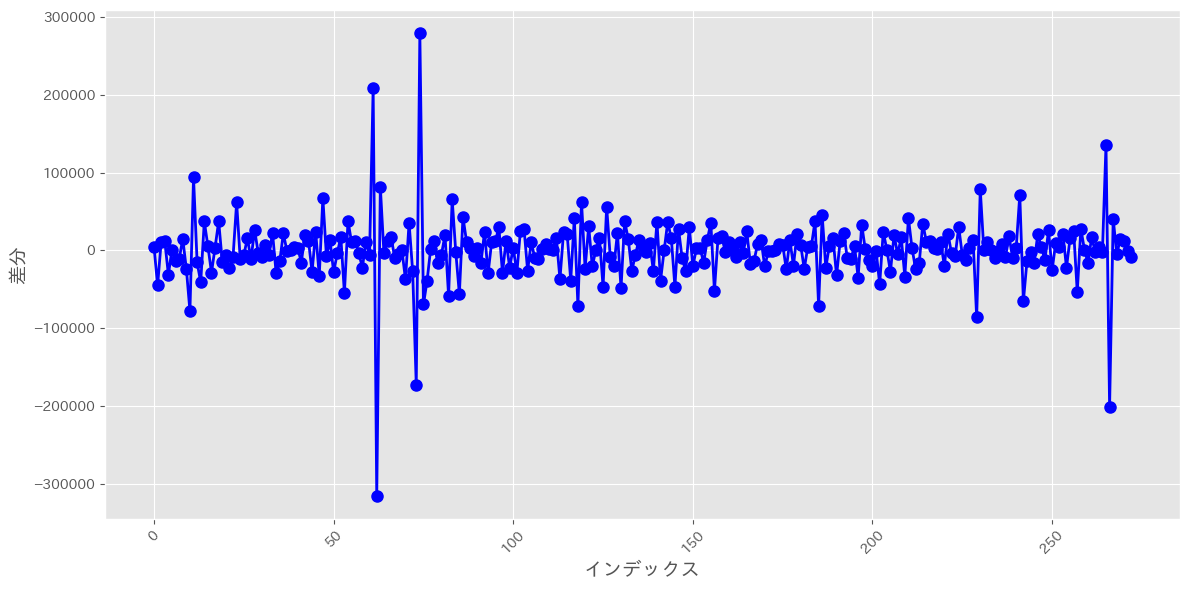

In [ ]:
#トレンドと季節性を抜いた後の折れ線グラフ

diff_without_seasonal = train.diff(1).diff(12).dropna()

plt.figure(figsize=(12, 6))
plt.plot(range(len(diff_without_seasonal)), diff_without_seasonal, marker='o', color='b', linestyle='-', linewidth=2, markersize=8)
plt.xlabel('インデックス', fontsize=14)
plt.ylabel('差分', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# グラフを表示
plt.show()

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


<Figure size 1200x600 with 0 Axes>

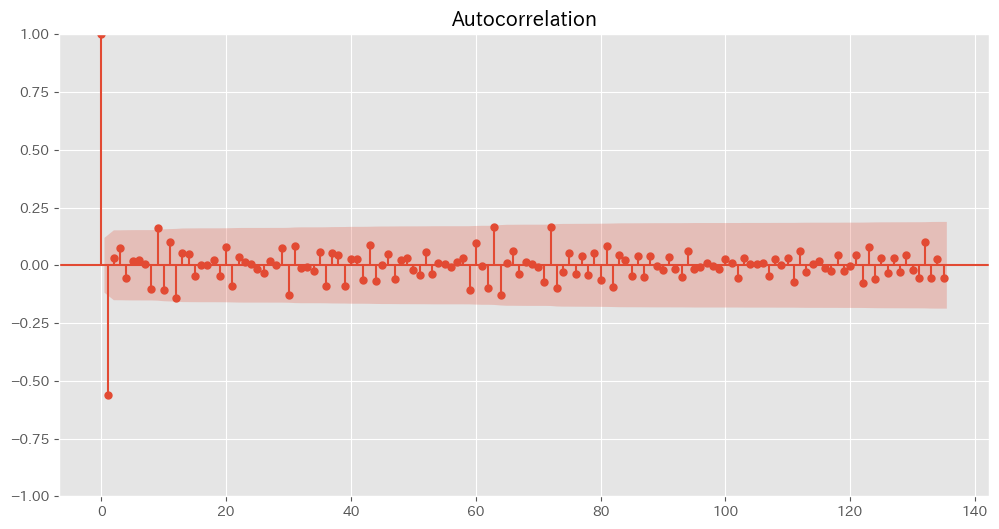

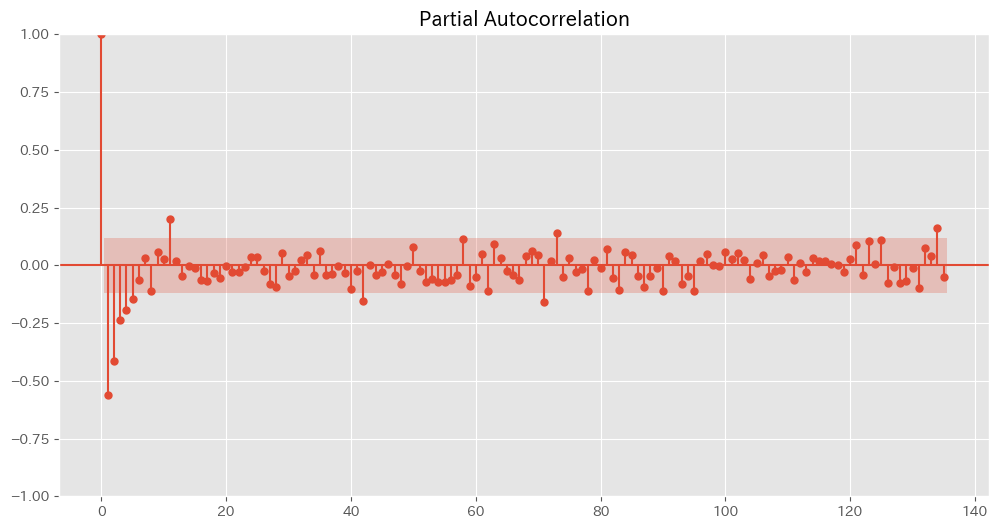

In [ ]:
# 季節性を抜いた後のコレログラム（自己相関と偏自己相関）
#print(diff_without_seasonal[:12])
plt.figure(figsize=(12, 6))
utils.plot_acf(diff_without_seasonal, alpha=.05, lags=135)
utils.plot_pacf(diff_without_seasonal, alpha=.05, lags = 135)

In [ ]:
# モデル構築（Auto ARIMA）
model = pm.auto_arima(train,
                       seasonal=True,
                       m=12,
                       d = 1,
                       D = 1,
                       trace=True,
                       error_action='ignore',
                       suppress_warnings=True,
                       n_jobs=1,
                       maxiter=10
                      )

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=6638.646, Time=1.02 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6602.088, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6592.727, Time=0.42 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6618.263, Time=0.51 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6604.146, Time=0.19 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6588.835, Time=0.95 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=6590.820, Time=1.52 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=6589.621, Time=0.65 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6590.465, Time=0.61 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6611.599, Time=1.24 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=6619.784, Time=1.57 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6614.559, Time=1.25 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=6621.847, Time=1.81 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=6590.755, Time=1.10 sec

Best model:  ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMAモデルのテストデータの予測結果:
286    608052.614592
287    780951.820298
288    602832.757209
289    476471.174288
290    720834.894488
           ...      
353    534242.135637
354    594971.490270
355    465625.803903
356    480432.868272
357    522808.653050
Name: predicted_mean, Length: 72, dtype: float64
平均二乗誤差 (MSE): 7653351244.712124
平均絶対誤差 (MAE): 50732.213648663674
平均絶対パーセント誤差 (MAPE): 0.14421017639620712


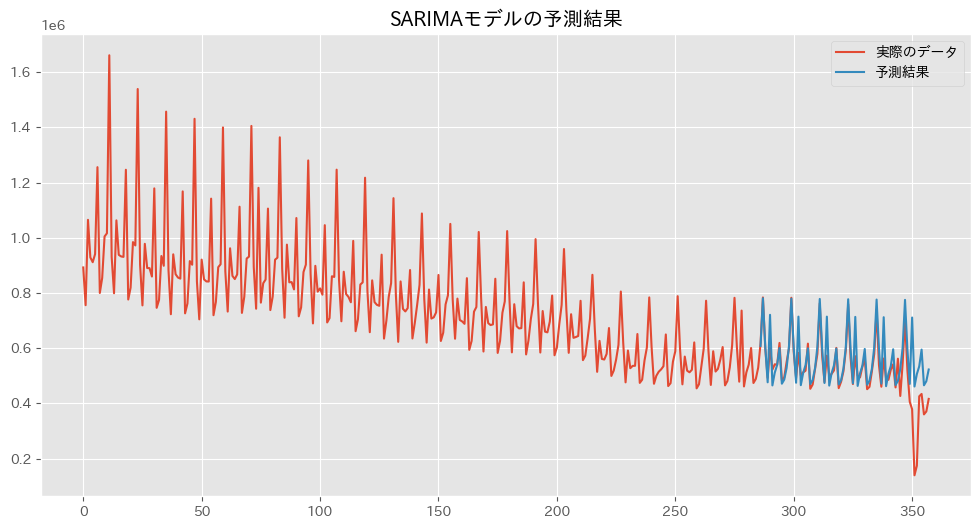

In [ ]:
#from sklearn.model_selection import train_test_split
# SARIMAモデルの作成

model = SARIMAX(train, order=(1, 1, 0),
                       seasonal_order=(2, 1, 0,12))

# モデルのフィッティング
result = model.fit()

# テストデータの予測
forecast = result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# 予測結果の表示
print("SARIMAモデルのテストデータの予測結果:")
print(forecast)

# テストデータと予測結果の比較
mape = mean_absolute_percentage_error(test, forecast)
print(f"平均絶対パーセント誤差 (MAPE): {mape}")


# 実際のデータと予測結果の可視化
plt.figure(figsize=(12, 6))
plt.plot(data, label='実際のデータ')
plt.plot(range(train_size, len(data)), forecast, label='予測結果')
plt.legend()
plt.title('SARIMAモデルの予測結果')
plt.show()

In [ ]:
# モデル構築（Auto ARIMA）
arima_model = pm.auto_arima(train,
                            seasonal=True,
                            m=12,
                            #max_d=3,
                            #max_D=3,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True)
                            #n_jobs=-1,
                            #maxiter=10)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=7444.745, Time=1.50 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7794.765, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7553.489, Time=0.25 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7552.400, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7792.778, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=7499.045, Time=0.50 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=7447.339, Time=0.77 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=7446.500, Time=3.35 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=7446.730, Time=4.05 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=7636.451, Time=0.17 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=7472.982, Time=1.70 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=7445.367, Time=2.79 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=6.13 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=7445.443, Time=0.82 sec
 ARIMA(2,1,1)(1,0,1)[12]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMAモデルのテストデータの予測結果:
286    606853.000532
287    779130.980031
288    589196.462901
289    475928.939070
290    577342.211473
           ...      
353    400405.346056
354    446829.625465
355    349610.801266
356    357273.342469
357    398112.680344
Name: predicted_mean, Length: 72, dtype: float64
平均絶対パーセント誤差 (MAPE): 0.16298527744921276


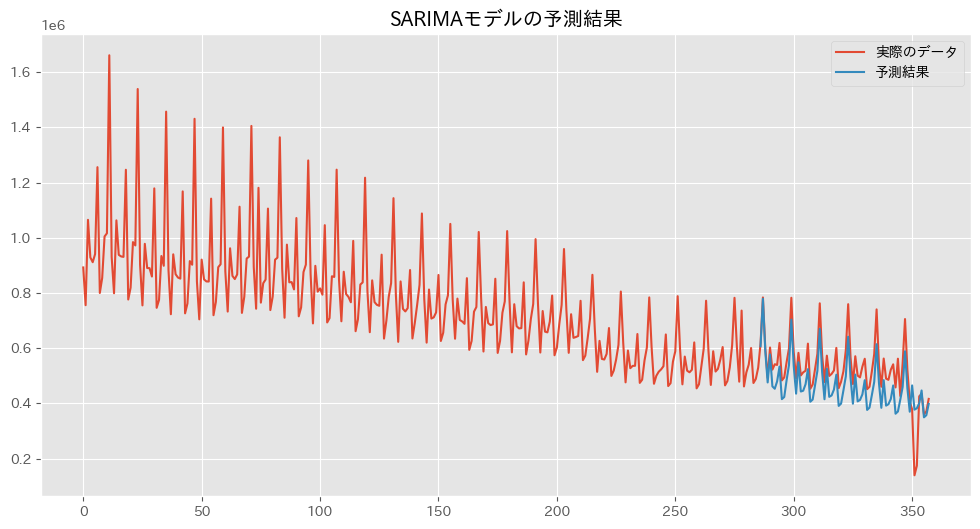

In [ ]:
#from sklearn.model_selection import train_test_split
# SARIMAモデルの作成

model = SARIMAX(train, order=(5, 1, 4),
                       seasonal_order=(1, 0, 1,12))

# モデルのフィッティング
result = model.fit()

# テストデータの予測
forecast = result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# 予測結果の表示
print("SARIMAモデルのテストデータの予測結果:")
print(forecast)

# テストデータと予測結果の比較
mape = mean_absolute_percentage_error(test, forecast)
print(f"平均絶対パーセント誤差 (MAPE): {mape}")


# 実際のデータと予測結果の可視化
plt.figure(figsize=(12, 6))
plt.plot(data, label='実際のデータ')
plt.plot(range(train_size, len(data)), forecast, label='予測結果')
plt.legend()
plt.title('SARIMAモデルの予測結果')
plt.show()

In [ ]:
import itertools

p = q = range(0, 6)
sp = sq = range(0, 5)
sd = d = range(0, 3)
#d = 0
#p,q,sp,sd,sqの組み合わせのリストを作成する。
pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
print(len(pdq))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(sp, sd, sq))]


50


In [ ]:
import warnings
warnings.filterwarnings("ignore")

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train, order = param, seasonal_order = param_seasonal)
            results = mod.fit()
            #print('ARIMAパラメータ{}, 季節変動パラメータ{} - AIC: {}'.format(param, param_seasonal, results.aic))
            mape = mean_absolute_percentage_error(test, forecast)
            if mape < best_result[2]:
                best_result = [param, param_seasonal, mape]
        except:
            continue

print('MAPE最小のモデル：', best_result)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


SARIMAモデルのテストデータの予測結果:
286    609784.0
287    781436.0
288    604098.0
289    477714.0
290    735235.0
         ...   
353    534514.0
354    594865.0
355    468057.0
356    482773.0
357    523478.0
Name: predicted_mean, Length: 72, dtype: float64
平均二乗誤差 (MSE): 8242747135.291714
平均絶対誤差 (MAE): 53221.597222222474
平均絶対パーセント誤差 (MAPE): 0.1486122114547173


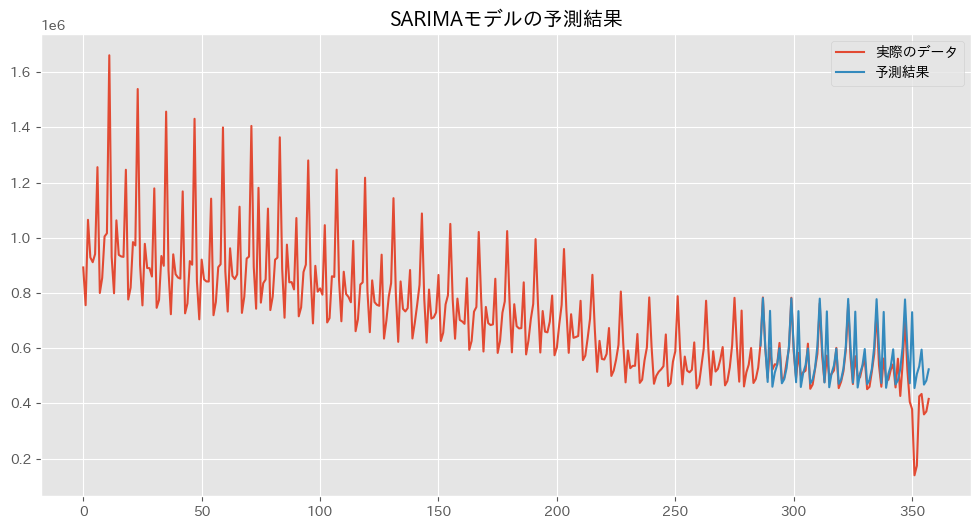

In [ ]:
#from sklearn.model_selection import train_test_split
# SARIMAモデルの作成

model = SARIMAX(train, order=(0, 1, 0),
                       seasonal_order=(0, 1, 0,12))

# モデルのフィッティング
result = model.fit()

# テストデータの予測
forecast = result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')

# 予測結果の表示
print("SARIMAモデルのテストデータの予測結果:")
print(forecast)

# テストデータと予測結果の比較
mape = mean_absolute_percentage_error(test, forecast)
print(f"平均絶対パーセント誤差 (MAPE): {mape}")


# 実際のデータと予測結果の可視化
plt.figure(figsize=(12, 6))
plt.plot(data, label='実際のデータ')
plt.plot(range(train_size, len(data)), forecast, label='予測結果')
plt.legend()
plt.title('SARIMAモデルの予測結果')
plt.show()

対数系列データ

In [ ]:
# 対数変換を行う
df_log = np.log(data)
print(df_log[:5])

# 学習データとテストデータに分割
train_size = int(len(df_log) * 0.8)  # 80%を学習データとする
train, test = df_log[:train_size], df_log[train_size:]
print(len(train))
print(train[:5])
print(len(test))
print(test[:5])

0    13.701661
1    13.535402
2    13.878344
3    13.741545
4    13.722692
Name: 百貨店販売額（S), dtype: float64
286
0    13.701661
1    13.535402
2    13.878344
3    13.741545
4    13.722692
Name: 百貨店販売額（S), dtype: float64
72
286    13.333047
287    13.571849
288    13.304001
289    13.107392
290    13.308825
Name: 百貨店販売額（S), dtype: float64


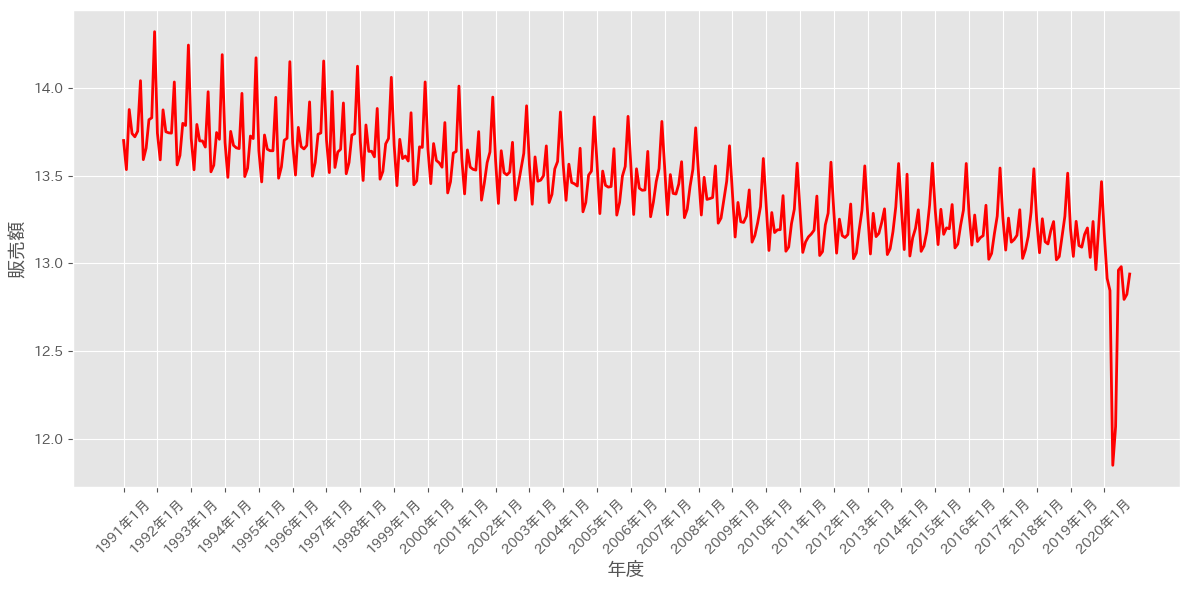

In [ ]:
# 系列のプロット
# 折れ線グラフを描画
plt.figure(figsize=(12, 6))
plt.xticks(np.arange(0, 360, step=12))
plt.plot(month, df_log, color='r', linestyle='-', linewidth=2, markersize=8)
plt.xticks(np.arange(0, 360, step=12))
plt.xlabel('年度', fontsize=14)
plt.ylabel('販売額', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# グラフを表示
plt.show()

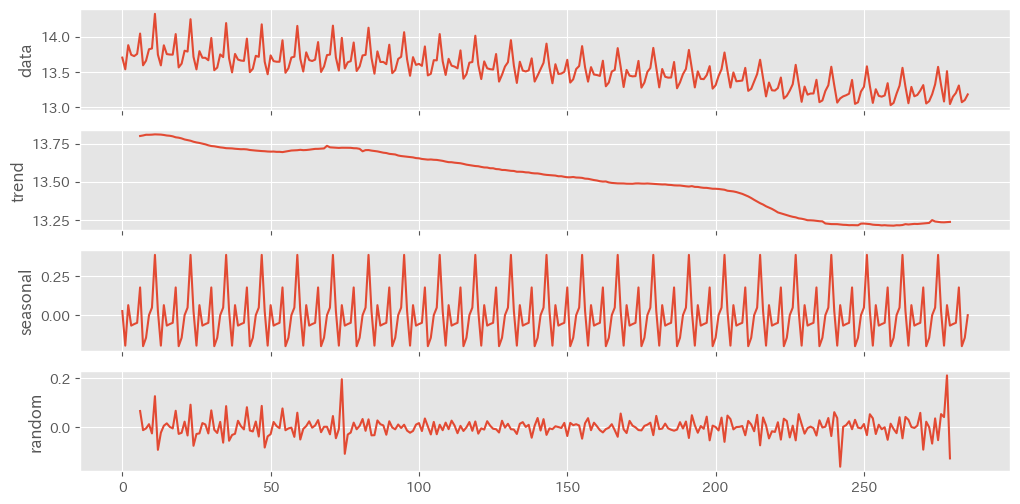

In [ ]:
train_values = train.values
utils.decomposed_plot(arima.decompose(train_values,'additive',m=12),
                      figure_kwargs = {'figsize': (12, 6)} )

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


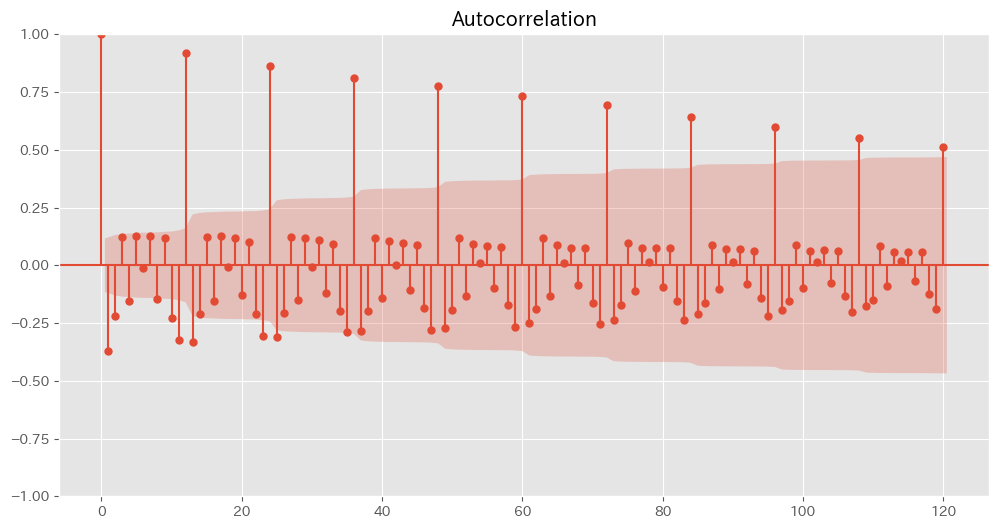

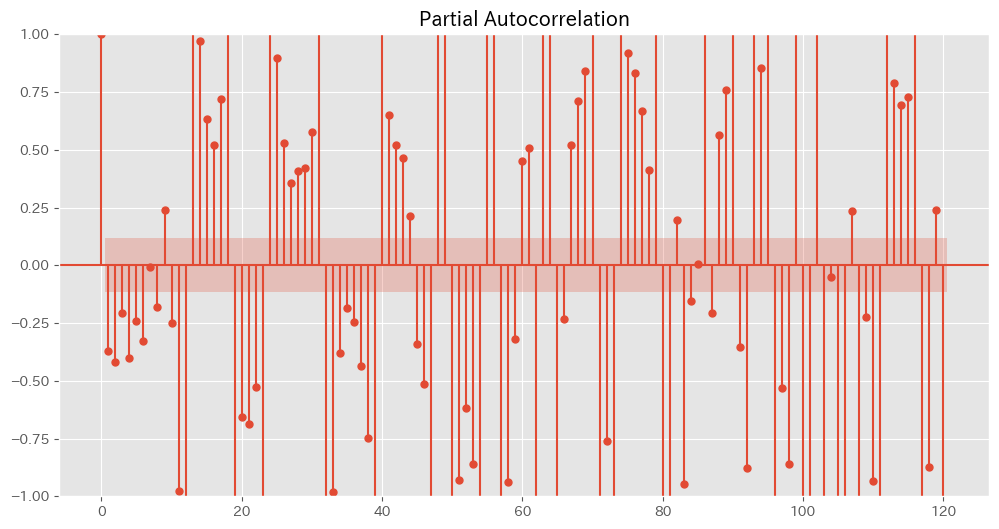

In [ ]:
data1 = train.diff(1).dropna()
utils.plot_acf(data1, alpha=.05, lags=120)
utils.plot_pacf(data1, alpha=.05, lags=120)

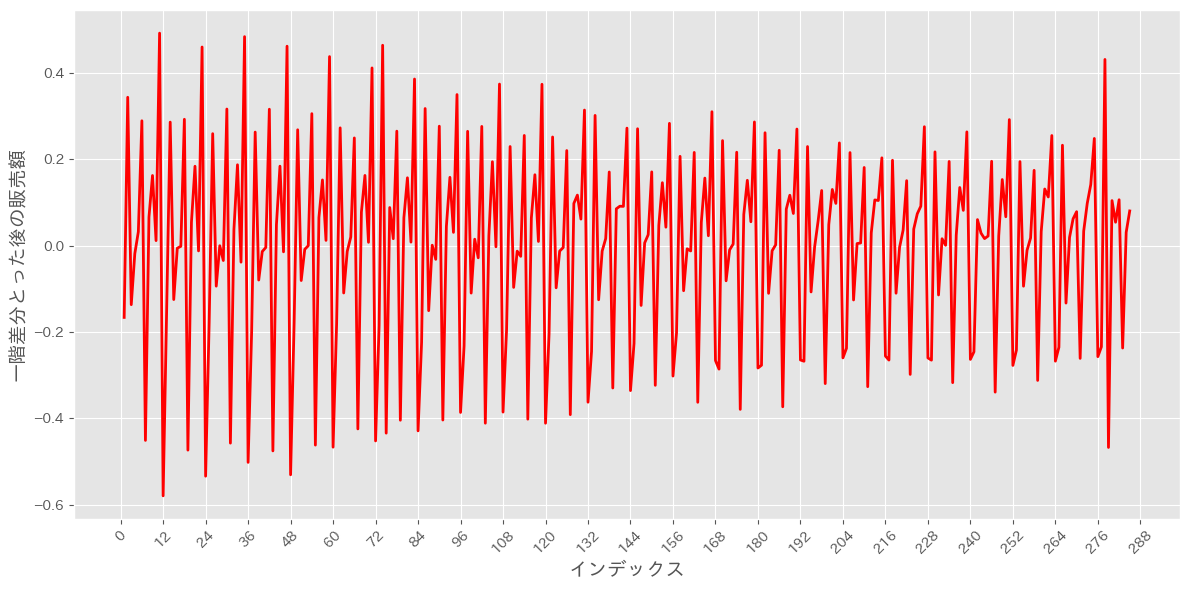

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(np.arange(0, 290, step=12))
plt.plot(data1, color='r', linestyle='-', linewidth=2, markersize=8)
plt.xticks(np.arange(0, 290, step=12))
plt.xlabel('インデックス', fontsize=14)
plt.ylabel('一階差分とった後の販売額', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


# グラフを表示
plt.show()

/usr/local/lib/python3.10/dist-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


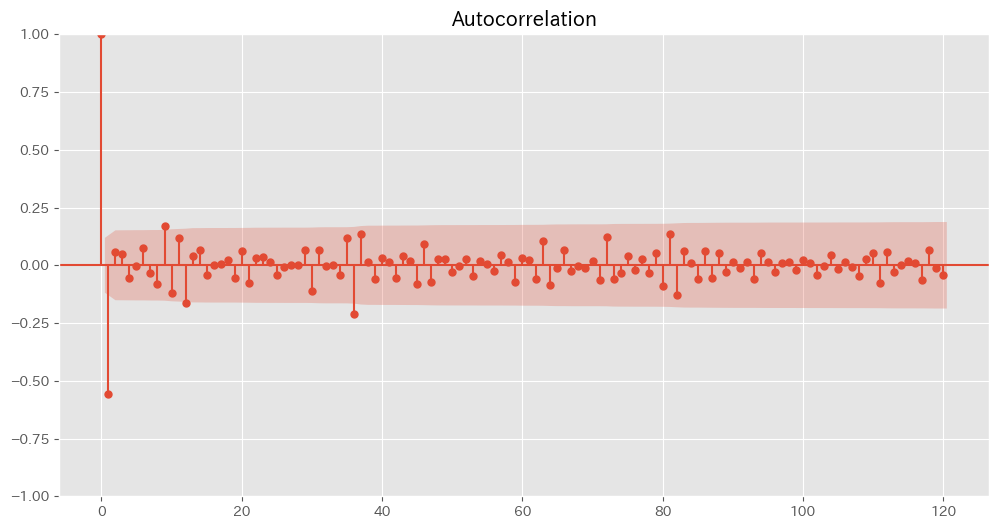

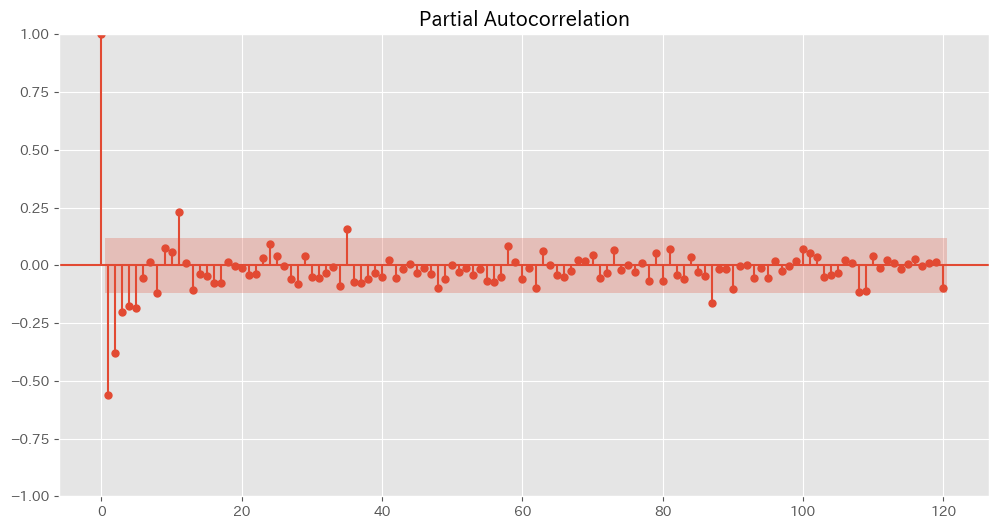

In [ ]:
# コレログラム（自己相関と偏自己相関）
data2 = train.diff(1).diff(12).dropna()
utils.plot_acf(data2, alpha=.05, lags=120)
utils.plot_pacf(data2, alpha=.05, lags=120)

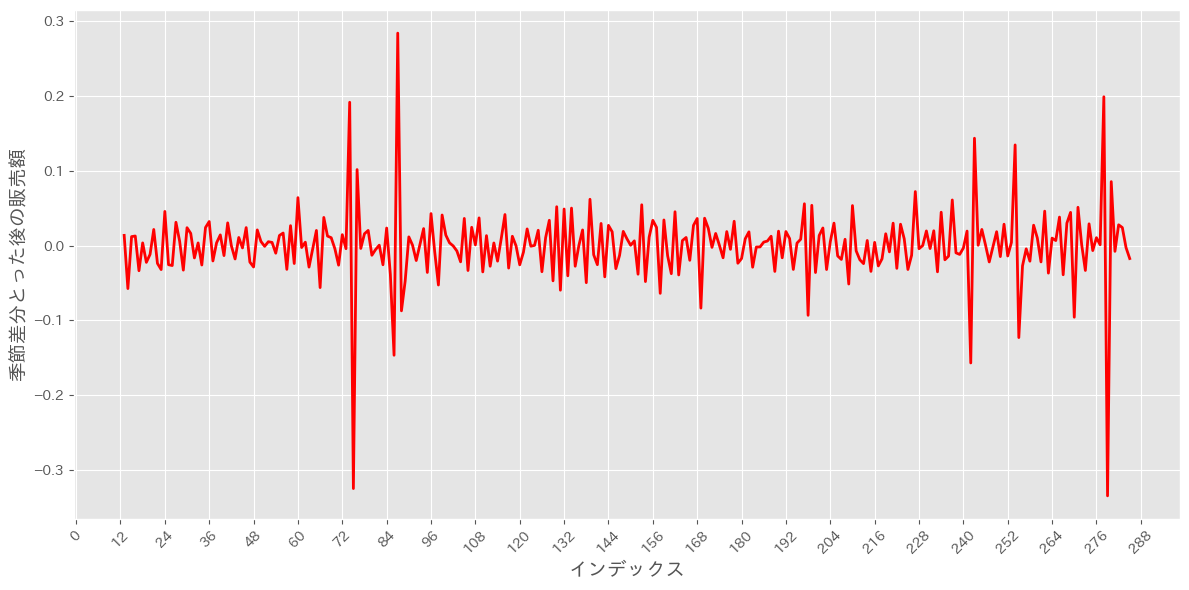

In [ ]:
plt.figure(figsize=(12, 6))
plt.xticks(np.arange(0, 290, step=12))
plt.plot(data2, color='r', linestyle='-', linewidth=2, markersize=8)
plt.xticks(np.arange(0, 290, step=12))
plt.xlabel('インデックス', fontsize=14)
plt.ylabel('季節差分とった後の販売額', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


In [ ]:
# モデル構築（Auto ARIMA）
arima_model = pm.auto_arima(train,
                            seasonal=True,
                            m=12,
                            d=1,
                            D=1,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=6638.646, Time=1.06 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=6602.088, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=6592.727, Time=0.41 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=6618.263, Time=0.55 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=6604.146, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=6588.835, Time=0.95 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=6590.820, Time=1.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=6589.621, Time=0.79 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=6590.465, Time=0.66 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=6611.599, Time=1.40 sec
 ARIMA(1,1,1)(2,1,0)[12]             : AIC=6619.784, Time=1.37 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=6614.559, Time=1.18 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=6621.847, Time=1.81 sec
 ARIMA(1,1,0)(2,1,0)[12] intercept   : AIC=6590.755, Time=1.35 sec

Best model:  ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


286    13.326464
287    13.569056
288    13.313787
289    13.076289
290    13.458721
Name: predicted_mean, dtype: float64
286    613210.769814
287    781566.909614
288    605486.269153
289    477485.391864
290    699919.623957
Name: predicted_mean, dtype: float64
平均絶対パーセント誤差 (MAPE): 0.15930118923804448


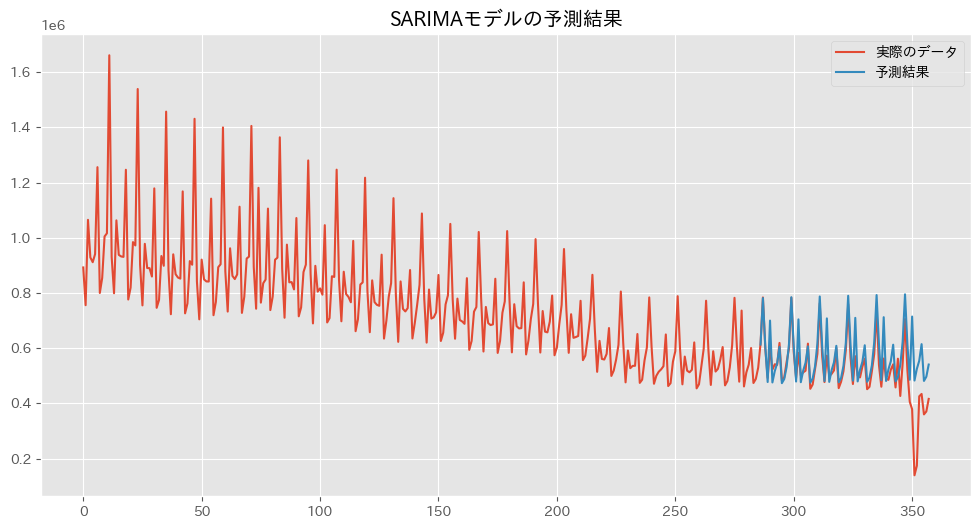

                                     SARIMAX Results                                      
Dep. Variable:                          百貨店販売額（S)   No. Observations:                  286
Model:             SARIMAX(1, 1, 0)x(2, 1, 0, 12)   Log Likelihood                 483.239
Date:                            Thu, 11 Jan 2024   AIC                           -958.478
Time:                                    13:37:38   BIC                           -944.040
Sample:                                         0   HQIC                          -952.682
                                            - 286                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5635      0.024    -23.941      0.000      -0.610      -0.517
ar.S.L12      -0.2410      0.034   

In [ ]:
# モデルのパラメータを設定する
order = (1, 1, 0)
seasonal_order = (2, 1, 0, 12)

# モデルを作成し、フィットさせる
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
result = model.fit()

# テストデータに対する予測を行う
forecast = result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
print(forecast[:5])
# 予測結果を元のスケールに戻す
forecast = np.exp(forecast)
print(forecast[:5])
train = np.exp(train)
test = np.exp(test)

# テストデータと予測結果の比較
mape = mean_absolute_percentage_error(test, forecast)
print(f"平均絶対パーセント誤差 (MAPE): {mape}")

# 実際のデータと予測結果の可視化
plt.plot(data, label='実際のデータ')
plt.plot(range(train_size, len(data)), forecast, label='予測結果')
plt.legend()
plt.title('SARIMAモデルの予測結果')
plt.show()
print(result.summary())


In [ ]:
# モデル構築（Auto ARIMA）
arima_model = pm.auto_arima(train,
                            seasonal=True,
                            m=12,
                            #d=1,
                            d_max = 1,
                            D_max = 1,
                            #D=1,
                            trace=True,
                            n_jobs=-1,
                            )

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=7444.745, Time=1.83 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=7794.765, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=7553.489, Time=0.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=7552.400, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=7792.778, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=7499.045, Time=0.50 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=7447.339, Time=1.04 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=7446.500, Time=3.33 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=7446.730, Time=3.97 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=7636.451, Time=0.18 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=7472.982, Time=1.68 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=7445.367, Time=2.95 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=inf, Time=6.96 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=7445.443, Time=0.93 sec
 ARIMA(2,1,1)(1,0,1)[12]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


286    13.323034
287    13.568930
288    13.311150
289    13.080154
290    13.453476
Name: predicted_mean, dtype: float64
286    611111.087859
287    781468.280933
288    603891.338543
289    479334.340955
290    696257.964335
Name: predicted_mean, dtype: float64
平均絶対パーセント誤差 (MAPE): 0.1631830222093842


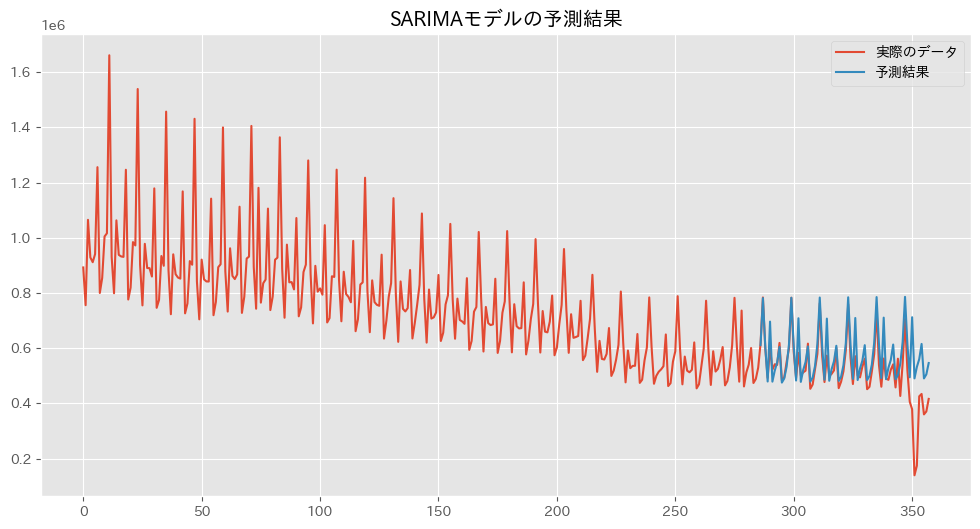

                                      SARIMAX Results                                      
Dep. Variable:                           百貨店販売額（S)   No. Observations:                  286
Model:             SARIMAX(2, 1, 1)x(2, 0, [], 12)   Log Likelihood                 521.229
Date:                             Fri, 12 Jan 2024   AIC                          -1030.458
Time:                                     01:30:07   BIC                          -1008.543
Sample:                                          0   HQIC                         -1021.673
                                             - 286                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2921      0.079     -3.691      0.000      -0.447      -0.137
ar.L2         -0.1286      

In [ ]:
# モデルのパラメータを設定する
order = (2, 1, 1)
seasonal_order = (2, 0, 0, 12)

# モデルを作成し、フィットさせる
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
result = model.fit()

# テストデータに対する予測を行う
#forecast = model_fit.forecast(steps=len(test))
forecast = result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
print(forecast[:5])
# 予測結果を元のスケールに戻す
forecast = np.exp(forecast)
print(forecast[:5])
train = np.exp(train)
test = np.exp(test)


# テストデータと予測結果の比較
mape = mean_absolute_percentage_error(test, forecast)
print(f"平均絶対パーセント誤差 (MAPE): {mape}")

# 実際のデータと予測結果の可視化
plt.plot(data, label='実際のデータ')
plt.plot(range(train_size, len(data)), forecast, label='予測結果')
plt.legend()
plt.title('SARIMAモデルの予測結果')
plt.show()
print(result.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


286    13.316996
287    13.550484
288    13.296629
289    13.076347
290    13.454957
Name: predicted_mean, dtype: float64
286    607432.525556
287    767185.411337
288    595185.914927
289    477513.258139
290    697290.325782
Name: predicted_mean, dtype: float64
平均絶対パーセント誤差 (MAPE): 0.1383749820158998


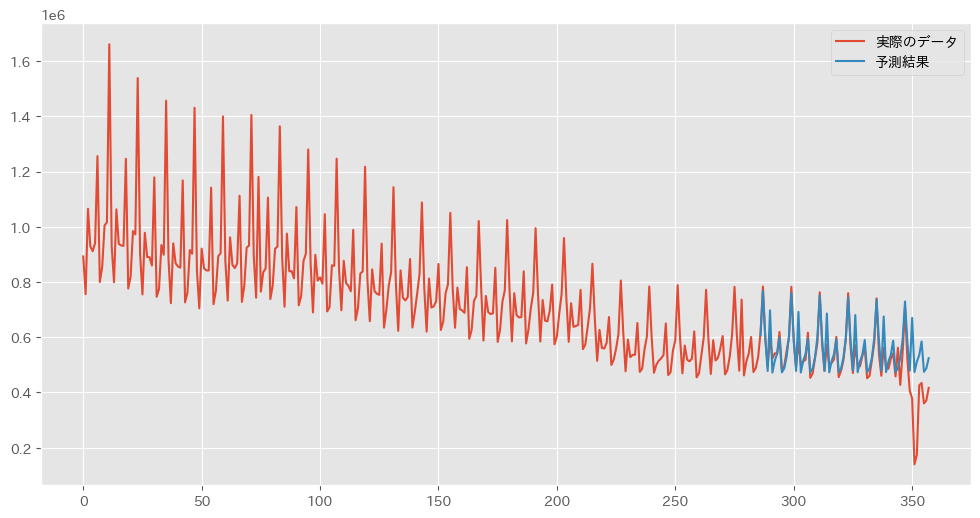

                                      SARIMAX Results                                       
Dep. Variable:                            百貨店販売額（S)   No. Observations:                  286
Model:             SARIMAX(5, 1, 4)x(1, 0, [1], 12)   Log Likelihood                 520.169
Date:                              Thu, 11 Jan 2024   AIC                          -1016.337
Time:                                      13:38:49   BIC                           -972.508
Sample:                                           0   HQIC                          -998.767
                                              - 286                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4173      1.125     -0.371      0.711      -2.623       1.789
ar.L2         -0.11

In [ ]:
# モデルのパラメータを設定する
order = (5, 1, 4)
seasonal_order = (1, 0, 1, 12)

# モデルを作成し、フィットさせる
model = SARIMAX(train, order=order, seasonal_order=seasonal_order)
result = model.fit()

# テストデータに対する予測を行う
#forecast = model_fit.forecast(steps=len(test))
forecast = result.predict(start=len(train), end=len(train) + len(test) - 1, typ='levels')
print(forecast[:5])
# 予測結果を元のスケールに戻す
forecast = np.exp(forecast)
print(forecast[:5])
train = np.exp(train)
test = np.exp(test)


# テストデータと予測結果の比較
mape = mean_absolute_percentage_error(test, forecast)
print(f"平均絶対パーセント誤差 (MAPE): {mape}")

# 実際のデータと予測結果の可視化
plt.plot(data, label='実際のデータ')
plt.plot(range(train_size, len(data)), forecast, label='予測結果')
plt.legend()
plt.show()
print(result.summary())


In [ ]:
import itertools

p = q = range(0, 6)
sp = sq = range(0, 3)
sd = d = range(0, 3)
#d = 0
#p,q,sp,sd,sqの組み合わせのリストを作成する。
pdq = [(x[0], x[1], x[2]) for x in list(itertools.product(p, d, q))]
print(len(pdq))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(sp, sd, sq))]


import warnings
warnings.filterwarnings("ignore")

best_result = [0, 0, 10000000]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = SARIMAX(train, order = param, seasonal_order = param_seasonal)
            results = mod.fit()
            #print('ARIMAパラメータ{}, 季節変動パラメータ{} - AIC: {}'.format(param, param_seasonal, results.aic))
            mape = mean_absolute_percentage_error(test, forecast)
            if mape < best_result[2]:
                best_result = [param, param_seasonal, mape]
        except:
            continue

print('MAPE最小のモデル：', best_result)

108
